In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("üå´üõ∏")

üå´üõ∏


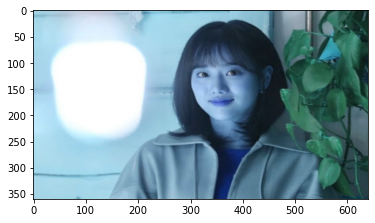

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

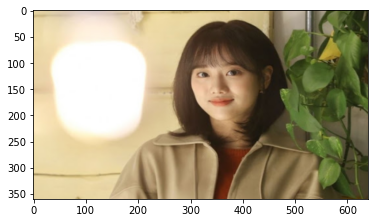

In [3]:
# RGBÎ≥ÄÌôò
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
#HOG ÎîîÌÖçÌÑ∞ ÏÑ†Ïñ∏

import dlib

detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

üå´üõ∏


In [5]:
#Î∞îÏö¥Îî© Î∞ïÏä§ Ï∂îÏ∂ú

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(296, 82) (425, 211)]]


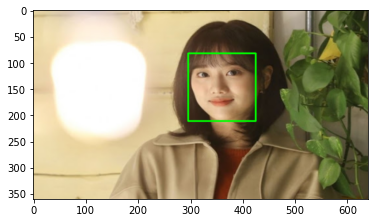

In [6]:
#Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Ï¢åÌëú

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# landmark model Î∂àÎü¨Ïò§Í∏∞

import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
# ÎûúÎìúÎßàÌÅ¨ Ï∞æÍ∏∞

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


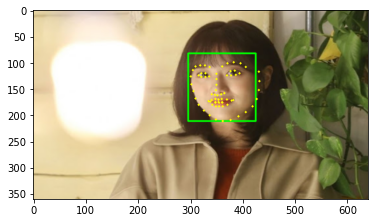

In [9]:
#ÎûúÎìúÎßàÌÅ¨ Ï∂úÎ†•

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
#Ï¢åÌëúÌôïÏù∏

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(349, 152)
(x,y) : (349,152)
(w,h) : (130,130)


In [11]:
#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [12]:
#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï¢åÌëú

refined_x = x - w // 2  # left
refined_y = y - h // 2     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (284,87)


In [13]:
#yÏ¢åÌëú (-)ÏùºÎïå , Ïù¥ÎØ∏ÏßÄ ÏûêÎ•¥Í∏∞, Í≤ΩÍ≥ÑÍ∞íÏùÑ 0ÏúºÎ°ú

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(130, 130, 3)
(x,y) : (284,87)


In [14]:
#ÏõêÎ≥∏ Ïä§Ìã∞Ïª§ Ï†ÅÏö©

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


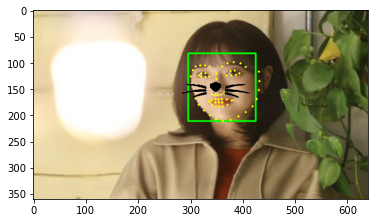

In [15]:
#Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

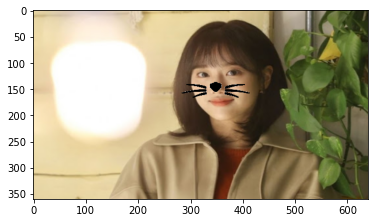

In [21]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

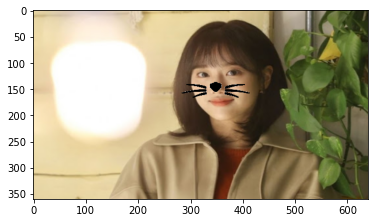

In [24]:
# Î∂àÌà¨Î™ÖÎèÑ Ï°∞Ï†à
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
#ÌöåÏ†ÑÏùÑ ÏúÑÌï¥ Î≤°ÌÑ∞Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÍ∞Ä Ï†ÅÏö©Îêú ÏΩîÎìúÎ•º Ï†ÅÏö©Ìï¥Î≥¥ÏïòÏßÄÎßå Í≤∞Í≥ºÎ¨ºÏù¥ Ï†úÎåÄÎ°ú ÎÇòÏò§ÏßÄ ÏïäÏïòÏäµÎãàÎã§.
#ÌöåÏ†Ñ Î≥ÄÌôòÎêú Ïù¥ÎØ∏ÏßÄÎäî ÏãúÍ≥µÍ∞ÑÏù¥ Îí§ÌãÄÎ†§ Ï∂úÎ†•ÎêòÏóàÏäµÎãàÎã§„Ö†„Ö†
